This part covers cleaning the original CMU dataset and merging it together with an IMDb movie ratings and othe relevant data to then be used in later parts.

In [1]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import numpy as np

## CMU Dataset Cleaning

In [ ]:
# Load the data
path0 = "Datasets/MovieSummaries/"
data = pd.read_table(path0+"movie.metadata.tsv", header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


In [ ]:
# Clean the formatting
def column_cleaner(df, columns):
    for col in columns:
        new_column = []
        for entry in df[col].values:
            l = []
            spl = re.split(', |: ', entry)
            for i in range(len(spl)):
                if i%2==1:
                    l.append(spl[i].translate(str.maketrans('', '', string.punctuation)))
            new_column.append(l)
        df[col] = new_column
    return df

In [ ]:
# Drop irrelevant column
data.drop(columns = 1, inplace=True)
data = column_cleaner(data, [6,7,8])

# Rename columns
data.columns = ["Movie_ID", "Title", "Release_Date","Revenue","Length","Languages","Countries","Genres"]
data = data.dropna(subset=['Release_Date'])
print(data.shape)
data.head()

(74839, 8)


,Movie_ID,Title,Release_Date,Revenue,Length,Languages,Countries,Genres
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [ ]:
# Infer the year from the release date
data["Year"] = [int(str(s)[:4]) for s in data["Release_Date"]]
data.head()

,Movie_ID,Title,Release_Date,Revenue,Length,Languages,Countries,Genres,Year
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983


In [7]:
data[data["Year"]==1010]        #Probably Typo in Release Date, Drop

,Movie_ID,Title,Release_Date,Revenue,Length,Languages,Countries,Genres,Year
62836,29666067,Hunting Season,1010-12-02,12160978.0,140.0,"[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",1010


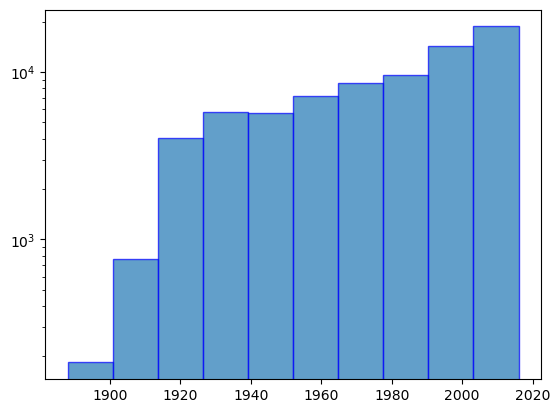

In [ ]:
# Check the distribution of the years after removing an outlier
data = data[data["Year"]!=1010]

plt.hist(data["Year"], log=True,edgecolor="b", alpha=.7)
plt.show()

## IMDb Dataset Fetching & Cleaning

In [ ]:
# Load the title information
path1 = "Datasets/IMD/"
imdb_a = pd.read_table(path1+"title.basics.tsv")
imdb_a.head(10)

In [ ]:
# Drop irrelevant columns
imdb_a.drop(columns=["titleType", "isAdult", "endYear", "runtimeMinutes"], inplace=True)
imdb_a.head()

In [ ]:
# Load the ratings information
imdb_b = pd.read_table(path1+"/title.ratings.tsv")
imdb_b.head(10)

In [ ]:
# Merge titles and ratings
imdb = pd.merge(imdb_a, imdb_b, on='tconst', how='inner')
imdb.head()

In [ ]:
# Drop empty values
imdb.replace("\\N", np.nan, inplace=True)
imdb.dropna(inplace=True)

# Clean the formatting
imdb["genres"] = [str.split(g) for g in imdb["genres"]]
imdb["Year"] = [int(y) for y in imdb["startYear"]]
imdb.drop(columns = "startYear", inplace=True)
imdb.head()

In [ ]:
# Check the distribution of the years
plt.hist(imdb["Year"], log=True,edgecolor="b", alpha=.7)
plt.show()

In [ ]:
# Leave relevant columns
imdb.columns = ["IMDb_Index", "Title", "Original_Title", "Genres_IMDb", "Rating", "Votes", "Year"]
imdb.head()

## Dataset Merging

In [ ]:
# Find common titles
titles_cmu = set([str(a).lower() for a in data["Title"]])
titles_imdb = set([str(a).lower() for a in imdb["Title"]])

common = titles_cmu.intersection(titles_imdb)
print(len(common))

In [ ]:
# Unify the column names
data = data.rename(columns={'Year': 'Year_data'})
imdb = imdb.rename(columns={'Year': 'Year_imdb'})

In [ ]:
# Merge the datasets
merged_data = pd.merge(data, imdb, on='Title', how='inner')
merged_data.head()

In [ ]:
# Check for discrepancies
print(merged_data.shape)
len(merged_data[merged_data["Year_data"]!=merged_data["Year_imdb"]])

In [ ]:
# Remove discrepancies
merged_data = merged_data[merged_data["Year_data"]==merged_data["Year_imdb"]]
merged_data = merged_data[~merged_data['Genres_IMDb'].astype(str).str.contains("Short")]
print(merged_data.shape)
merged_data.head()

In [ ]:
merged_data = merged_data.rename(columns={'Year_data': 'Year'})
merged_data.drop(columns = "Year_imdb", inplace=True)

In [ ]:
# Leave relevant columns
merged_data = merged_data[["Movie_ID", "IMDb_Index", "Title", "Original_Title", "Release_Date", "Year", "Genres", "Genres_IMDb", "Rating", "Votes", "Revenue", "Length", "Languages", "Countries"]]
merged_data.head()

In [ ]:
merged_data.to_csv('data/filtered_movie_data.csv', index=False)

## Usage Example

In [ ]:
# Import
data = pd.read_table("data/filtered_movie_data.csv", sep=",")
data.head(10)

In [ ]:
# Convert Movie Genres to Lists, can be extended to other columns
data['Genres'] = data['Genres'].fillna("[]")
data['Genres'] = data['Genres'].str.strip("[]").str.replace("'", "").str.split(", ")

data['Genres_IMDb'] = data['Genres_IMDb'].fillna("[]")
data['Genres_IMDb'] = data['Genres_IMDb'].str.strip("[]").str.replace("'", "").str.split(",")